In [1]:
# import os
# import requests
# import base64

# # Function to encode the image
# def encode_image(image_path):
#   with open(image_path, "rb") as image_file:
#     return base64.b64encode(image_file.read()).decode('utf-8')

# # Configuration
# GPT4V_KEY = "6b9d488c317d4babb35cb2c6f23ed242"

# prompt_template = """
# You are an AI Agent whose goal is to describe tasks to perform to another AI capable of executing actions by writing Playwright code.
# To do so, you are given a screenshot and objectives.
# You must provide your answer inside a markdown, with the form 'Select element X, then do Y'.
# Leverage as much information from the screenshot to make it easy to identify the element, such as placeholders or text.
# Do not make assumptions about elements you do not see.

# Here are previous examples:
# ---
# Objective: Click on $50 to $100 price range filter
# Output:
# Let's think step by step.
# This is a screenshot of an e-commerce website.
 
# Given the screenshot, the option '$50 to $100' is a radio button. It is under the 'Price' section, which might be helpful to identify the element.
# Therefore the instructions are:
# ```
# - Select the radio button '$50 to $100' under Price, then click on it.
# ```
# ---
# Objective: Click on 'Datasets'
# Output:
# Let's think step by step.
 
# Given the screenshot, 'Datasets' seems to be a button on the menu. Nearby elements on the menu are called 'Models' and 'Spaces'.
# Therefore the instructions are:
# ```
# - Select the 'Datasets' element on the menu next to 'Models' and 'Spaces', then click on it.
# ```
# ---
# ---
# Objective: Write 'Hello world' in the search bar
# Output:
# Let's think step by step.
 
# Given the screenshot, the search bar has a placeholder 'Search here...'. 
# Therefore the instructions are:
# ```
# - Select the input element with placeholder 'Search here...', then type 'Hello world'.
# ```
# ---

# Objective: {objective}
# Output:
# Let's think step by step.
# """

In [1]:
from IPython.display import Image, display
from selenium import webdriver

def highlight_element(driver, element):
    # Apply style to the element
    driver.execute_script("arguments[0].setAttribute('style', arguments[1]);", element, "border: 2px solid red;")
    
    # Take a screenshot
    screenshot_path = './screenshot.png'  # Update path as necessary
    driver.save_screenshot(screenshot_path)
    
    # Display the screenshot
    display(Image(filename=screenshot_path))
    
    # Optionally, remove the style after taking the screenshot if you don't want it to persist
    driver.execute_script("arguments[0].setAttribute('style', arguments[1]);", element, "")

In [2]:
import os
import requests
import base64

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Configuration
GPT4V_KEY = "6b9d488c317d4babb35cb2c6f23ed242"

prompt_template = """
You are an AI system whose goal is to generate training examples to teach other AIs to think and reach objectives given by humans and a screenshot of the current page.
The AIs to be taught have to write their thought process and propose an instruction to be performed.
Your answer should contain your thoughts in bullet points, and the instruction for the next step to be performed.
The instruction should be detailled as possible and only contain one step. Do not provide bullet points or multiple steps.
Leverage as much information from the screenshot to make it easy to identify the element, such as placeholders or text.
Do not make assumptions about elements you do not see.
If the objective is already achieved in the screenshot, provide the instruction 'STOP'.

Here are previous examples:
Objective: Ask the AI model 'Command R plus' 'What is love'
Thought: 
- I am on the Hugging Face website. 
- Hugging Face is a company that hosts AI models, and allows users to interact with models on them through the chat.
- Therefore, to answer the objective of asking the AI model 'Command R Plus' 'What is love', we need first to find the model page.
- Given the current screenshot, the fastest way to find the model page seems to be to use the search bar.
Instruction: Type 'Command R plus' on the search bar with placeholder "Search ..." and click on the first result

Objective: Explore the latest updates on the model 'Meta-Llama-3-8B'
Thought:
- I am currently viewing the Hugging Face website, a hub for AI models and datasets.
- On this platform, users can explore and interact with a variety of AI models.
- From the current screenshot, I see that the model 'Meta-Llama-3-8B' is displayed in the "Trending" section.
- To investigate the updates made to 'Meta-Llama-3-8B', the best approach is to go directly to the model's specific page where information will be available
Instruction: Click on 'Meta-Llama-3-8B' listed under the "Trending" section to navigate to the model's detailed page.

Objective: 
Thought:
- The current page is the documentation section for 'PEFT' on the Hugging Face website.
- The main content area already has a section labeled 'Quicktour', indicating that the quicktour content is already being displayed.
- Since the quicktour is already shown, no further action is required to achieve the objective. 
Instruction: STOP

Objective: {objective}
Thought:
"""

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import os.path

chrome_options = Options()
chrome_options.add_argument("--headless")  # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--window-size=1600,900")

homedir = os.path.expanduser("~")

# Paths to the chromedriver files
path_linux = f"{homedir}/chromedriver-linux64/chromedriver"
path_testing = f"{homedir}/chromedriver-testing/chromedriver"
path_mac = (
    "Google Chrome for Testing.app/Contents/MacOS/Google Chrome for Testing"
)

# To avoid breaking change kept legacy linux64 path
if os.path.exists(path_linux):
    chrome_options.binary_location = f"{homedir}/chrome-linux64/chrome"
    webdriver_service = Service(f"{homedir}/chromedriver-linux64/chromedriver")
elif os.path.exists(path_testing):
    if os.path.exists(f"{homedir}/chrome-testing/{path_mac}"):
        chrome_options.binary_location = f"{homedir}/chrome-testing/{path_mac}"
    # Can add support here for other chrome binaries with else if statements
    webdriver_service = Service(f"{homedir}/chromedriver-testing/chromedriver")
else:
    raise FileNotFoundError("Neither chromedriver file exists.")

driver = webdriver.Chrome(service=webdriver_service, options=chrome_options)
import os
from llama_index.llms.azure_openai import AzureOpenAI
from lavague.retrievers import BM25HtmlRetriever, OpsmSplitRetriever
from lavague.defaults import DefaultEmbedder

# api_key=os.getenv("AZURE_OPENAI_KEY")
# api_version="2024-02-15-preview"
# azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
# model = "gpt-35-turbo"
# deployment_name = "gpt-35-turbo"

# from llama_index.llms.azure_openai import AzureOpenAI
# import os

api_key=os.getenv("AZURE_OPENAI_KEY")
api_version="2023-05-15"
azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
model = "gpt-4"
deployment_name = "gpt-4-turbo"

llm = AzureOpenAI(
    model=model,
    deployment_name=deployment_name,
    api_key=api_key,
    azure_endpoint=azure_endpoint,
    api_version=api_version,
    temperature=0.0
)

embedder = DefaultEmbedder()
bm25_retriever = BM25HtmlRetriever(embedder)
opsm_retriever = OpsmSplitRetriever(embedder)
from lavague.action_engine import ActionEngine

opsm_retriever = OpsmSplitRetriever(embedder)
action_engine = ActionEngine(llm, bm25_retriever)

/home/daniel/miniconda3/envs/lavague/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import re

def extract_instructions_from_markdown(markdown_text):
    code_blocks = re.findall(r'```(?:\w+)?\n(.*?)\n```', markdown_text, re.DOTALL)
    instructions = []
    for code_block in code_blocks:
        instructions.extend(re.findall(r'^\s*-\s*(.*?)\s*$', code_block, re.MULTILINE))
    return instructions
def get_instructions(driver, objective):
    headers = {
        "Content-Type": "application/json",
        "api-key": GPT4V_KEY,
    }
    driver.save_screenshot("screenshot.png")
    image_path = "screenshot.png"

    # Getting the base64 string
    base64_image = encode_image(image_path)

    prompt = prompt_template.format(objective=objective)

    # Payload for the request
    payload = {
    "messages": [
        {
        "role": "user",
        "content": [
            {
            "type": "text",
            "text": prompt
            },
            {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}"
            }
            }
        ]
        }
    ],
    "temperature": 0.7,
    "top_p": 0.95,
    "max_tokens": 800
    }

    GPT4V_ENDPOINT = "https://mith-oai-west.openai.azure.com/openai/deployments/gpt-4-vision/chat/completions?api-version=2023-07-01-preview"

    # Send request
    try:
        response = requests.post(GPT4V_ENDPOINT, headers=headers, json=payload)
        response.raise_for_status()  # Will raise an HTTPError if the HTTP request returned an unsuccessful status code
    except requests.RequestException as e:
        raise SystemExit(f"Failed to make the request. Error: {e}")

    output = response.json()["choices"][0]["message"]["content"]
    instruction = output
    return instruction

def execute_instructions(driver, action_engine, query):

    html = driver.page_source

    action = action_engine.get_action(query, html)
    exec(action)

    driver.save_screenshot("screenshot.png")

    from IPython.display import Image, display
    display(Image("screenshot.png"))


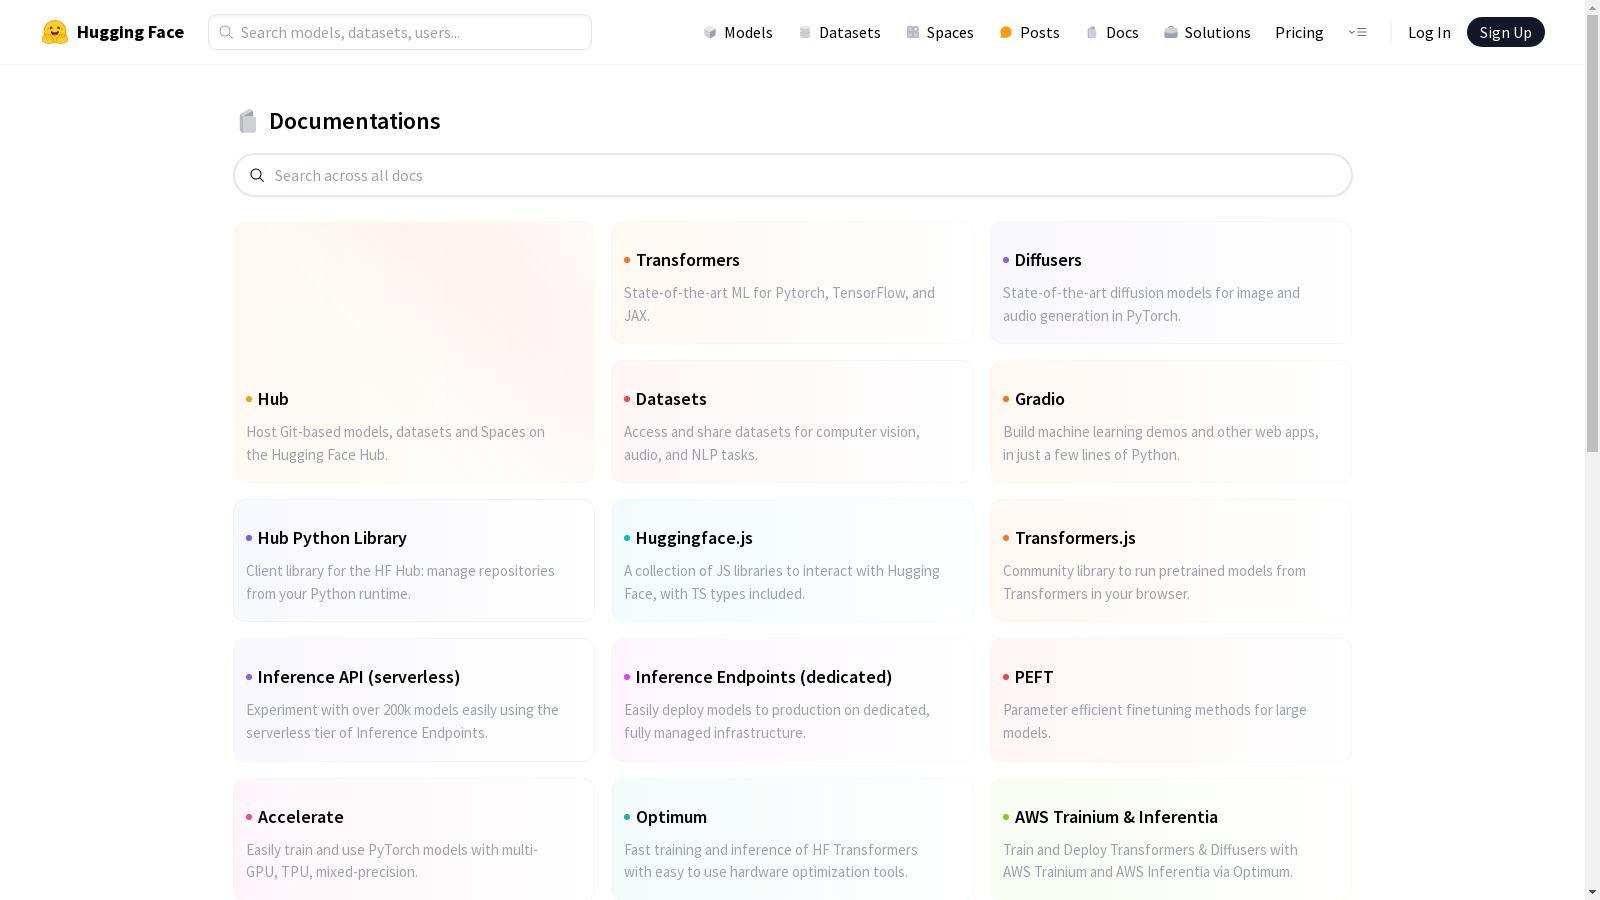

In [38]:
driver.get("https://huggingface.co/docs")
driver.save_screenshot("screenshot.png")

from IPython.display import Image, display
display(Image("screenshot.png"))

In [39]:
objective = "Show the quicktour of PEFT"
instructions = get_instructions(driver, objective)

In [43]:
print(instructions)

Thought:
- I am on the Hugging Face documentation page.
- This page contains various sections about different tools and libraries related to machine learning.
- The objective is to show the quicktour of 'PEFT', which is likely a tool or feature on this platform.
- From the current screenshot, 'PEFT' is visible under a section with other tools.
- To show the quicktour, it is necessary to access more detailed information about 'PEFT'.

Instruction: Click on 'PEFT' under the section that contains 'Inference Endpoints (dedicated)' and 'Optimum' to access its detailed information and quicktour.


In [42]:
query = " Click on 'PEFT'"
html = driver.page_source

action = action_engine.get_action(query, html)
print(action)

/home/daniel/miniconda3/envs/lavague/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


# Let's proceed step by step.
# First we need to identify the link that contains the text 'PEFT', then we can click on it.

# Based on the HTML provided, we can identify the link by the text 'PEFT' within a span element.
# We will use the text content to identify the link precisely.
peft_link = driver.find_element(By.XPATH, """//*[contains(@href,"/docs/peft")][contains(@class,"group")][.//span[contains(text(),"PEFT")]]""")

# Then we can click on the link
peft_link.click()


In [44]:
# Based on the HTML provided, we can identify the link by the text 'PEFT' within a span element.
# We will use the text content to identify the link precisely.
peft_link = driver.find_element(By.XPATH, """//*[contains(@href,"/docs/peft")][contains(@class,"group")][.//span[contains(text(),"PEFT")]]""")

# Then we can click on the link
peft_link.click()

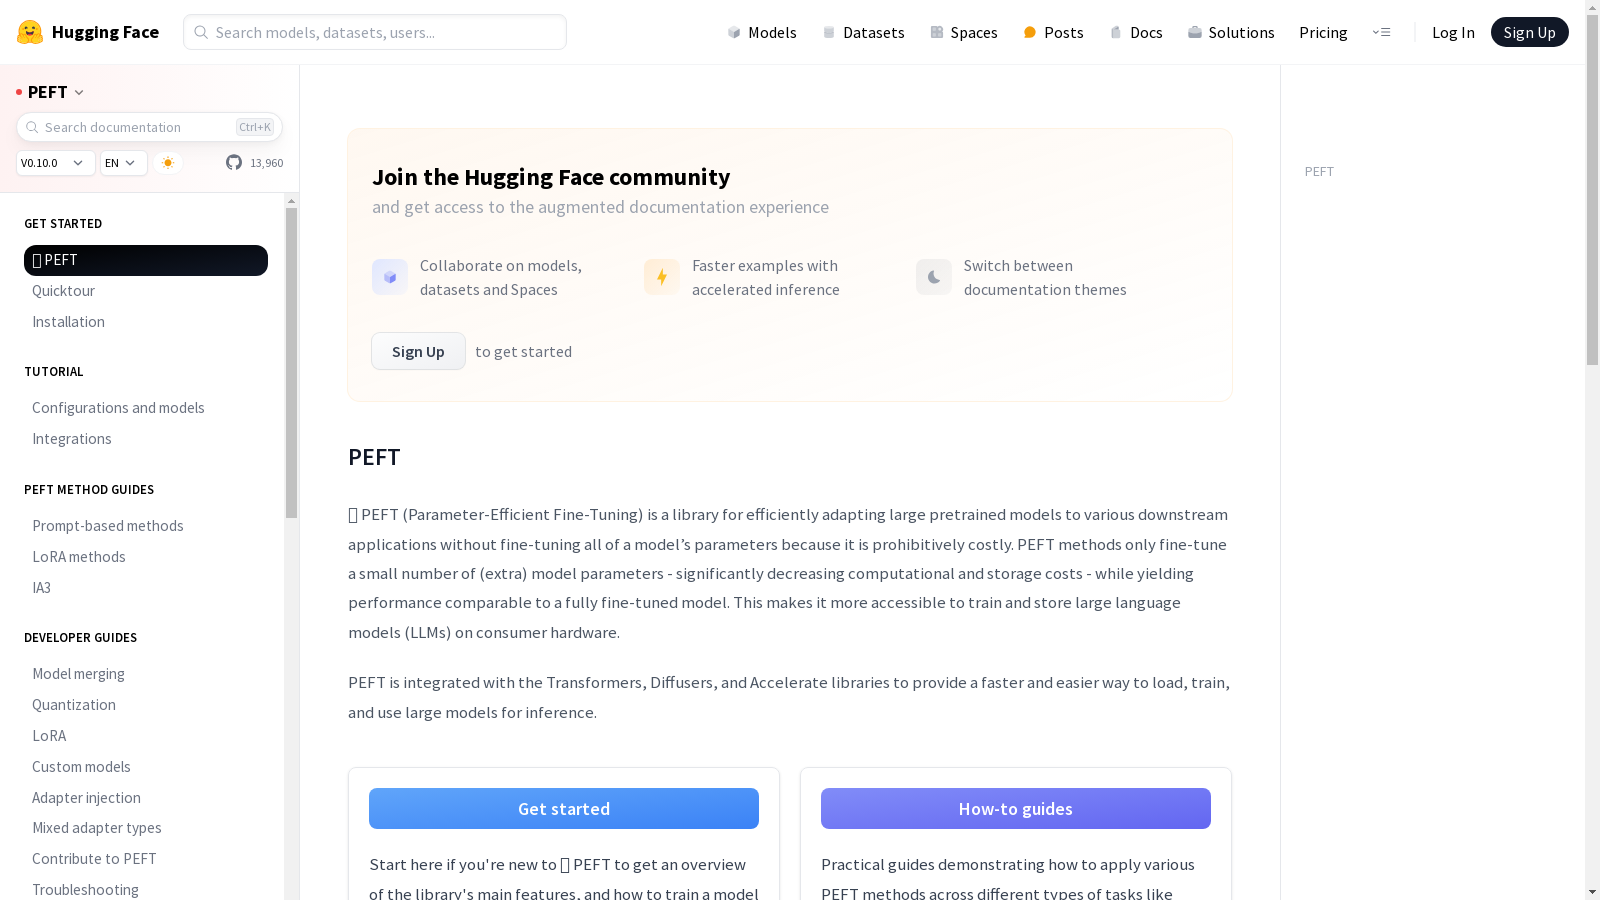

In [46]:
driver.save_screenshot("screenshot.png")
display(Image("screenshot.png"))

In [16]:
objective = "Show the quicktour of PEFT"
instructions = get_instructions(driver, objective)

- I am on the documentation page of PEFT on the Hugging Face website.
- PEFT stands for Parameter-Efficient Fine-Tuning, a library mentioned in the main description on the page.
- The screenshot shows two main buttons, 'Get started' and 'How-to guides', which likely contain detailed information about PEFT.
- To learn more about PEFT, it would be beneficial to start with the basics.

Instruction: Click on the 'Get started' button under the PEFT description to access introductory information about PEFT.


In [17]:
query = "Click on the 'Get started' button under the PEFT description to access introductory information about PEFT."
html = driver.page_source

action = action_engine.get_action(query, html)
print(action)

/home/daniel/miniconda3/envs/lavague/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


# Let's proceed step by step.
# First we need to identify the button first, then we can click on it.

# Based on the HTML provided, we need to devise the best strategy to select the button.
# The button can be identified using the text "Quicktour" which seems to be related to the introductory information about PEFT.
# We will use the text and the href attribute to make sure we are clicking the correct link.
get_started_button = driver.find_element(By.XPATH, """//*[contains(@href,"/docs/peft/quicktour")][contains(.,"Quicktour")]""")

# Then we can click on it
get_started_button.click()


In [47]:
# Let's proceed step by step.
# First we need to identify the button first, then we can click on it.

# Based on the HTML provided, we need to devise the best strategy to select the button.
# The button can be identified using the text "Quicktour" which seems to be related to the introductory information about PEFT.
# We will use the text and the href attribute to make sure we are clicking the correct link.
get_started_button = driver.find_element(By.XPATH, """//*[contains(@href,"/docs/peft/quicktour")][contains(.,"Quicktour")]""")

# Then we can click on it
get_started_button.click()

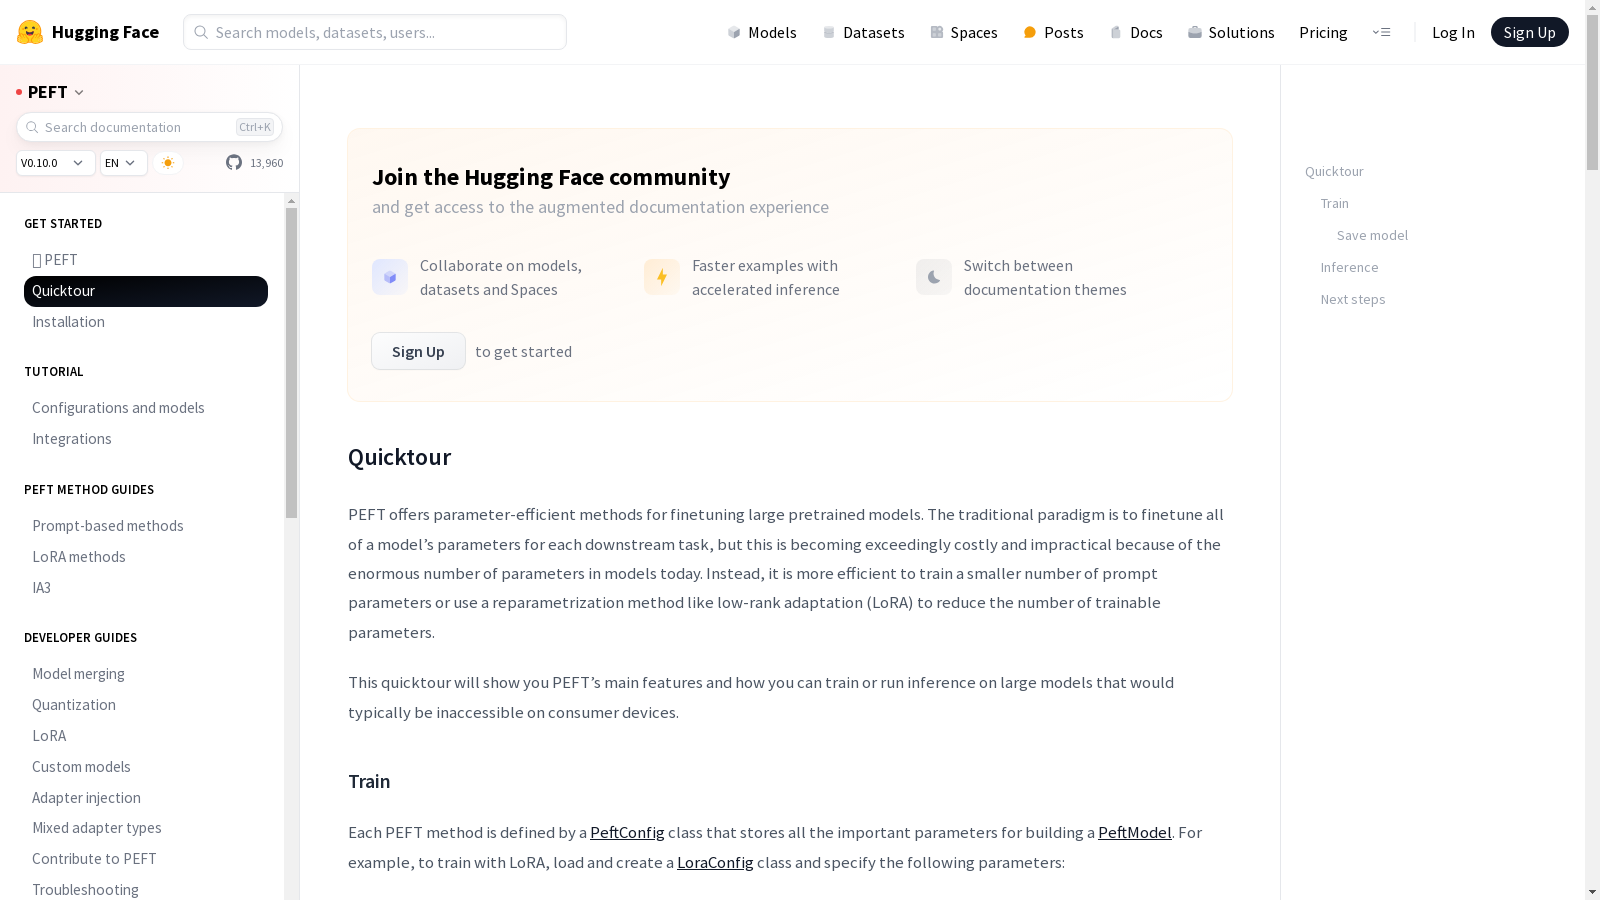

In [19]:
driver.save_screenshot("screenshot.png")
display(Image("screenshot.png"))

In [48]:
objective = "Show the quicktour of PEFT"
instructions = get_instructions(driver, objective)
print(instructions)

- The current page is the documentation section for 'PEFT' on the Hugging Face website.
- The left sidebar has a list of sections within the PEFT documentation, and 'Quicktour' is one of the options.
- The main content area already has a section labeled 'Quicktour', indicating that the quicktour content is already being displayed.
- The objective is to show the quicktour, which is already visible in the screenshot. 
- Since the quicktour is already shown, no further action is required to achieve the objective. 

No further instruction needed as the objective is already achieved in the current screenshot.


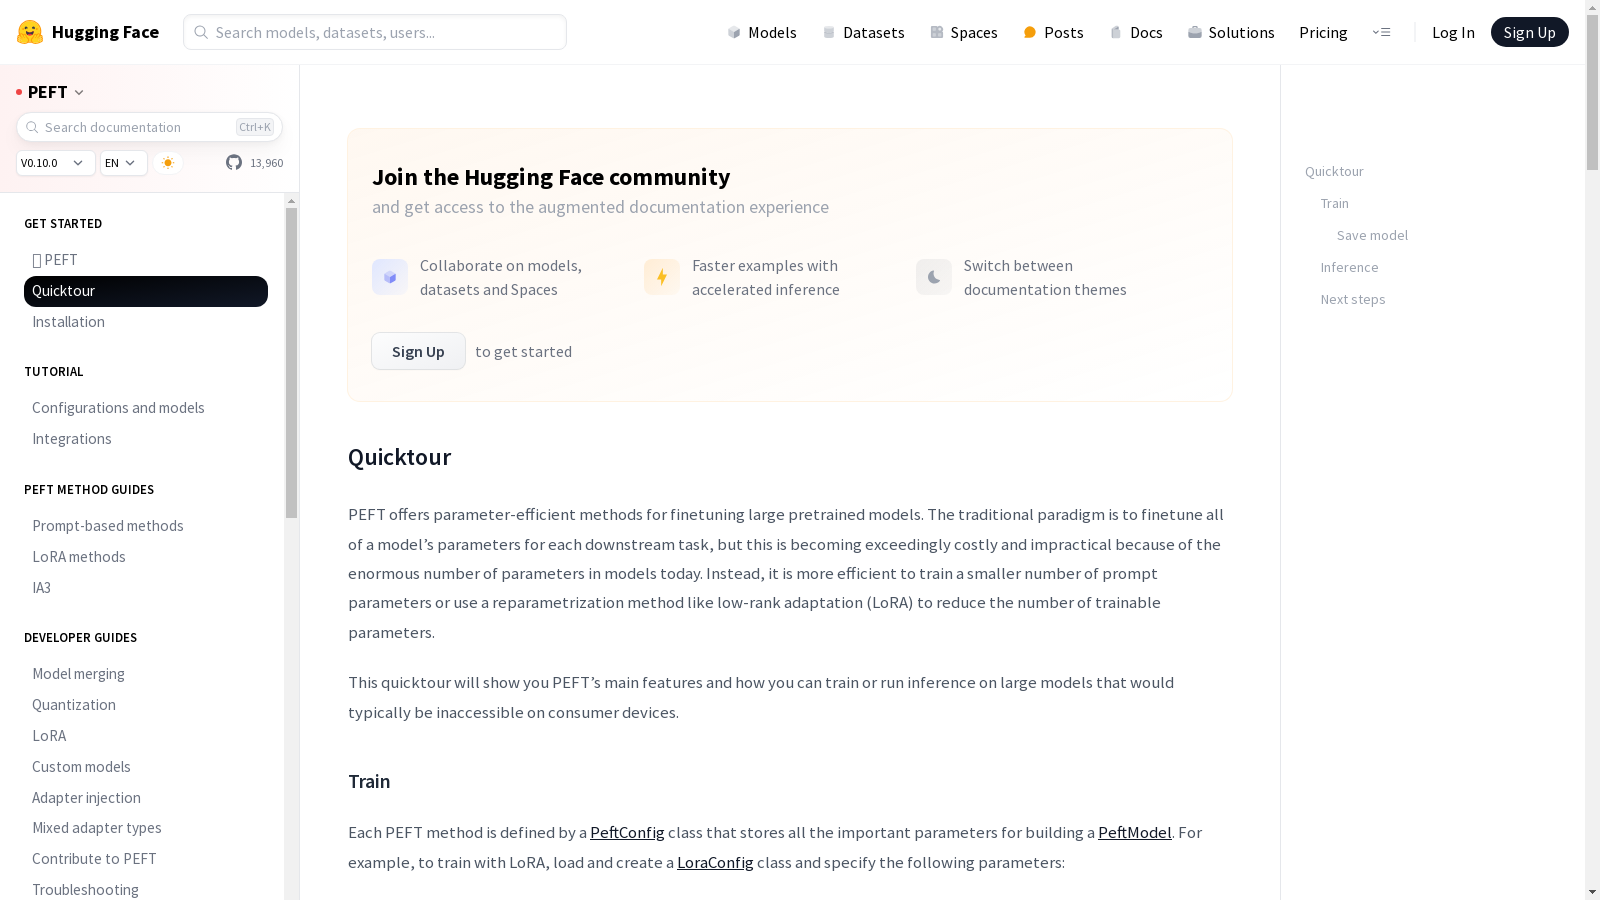

In [23]:
driver.save_screenshot("screenshot.png")
display(Image("screenshot.png"))

In [34]:
query = "Select the text under the 'Quicktour' title and print it"
html = driver.page_source

nodes = action_engine.get_nodes(query, html)
context= "\n".join(nodes)
action = action_engine.action_from_context(context, query)
print(action)

/home/daniel/miniconda3/envs/lavague/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


# Let's proceed step by step.
# First we need to identify the element containing the text under the 'Quicktour' title.

# Based on the HTML snippet provided, we can identify the 'Quicktour' title by its href attribute and id.
quicktour_element = driver.find_element(By.XPATH, """//*[contains(@href,"#quicktour")][contains(@id,"nav-quicktour")]""")

# Now we need to get the text from this element.
quicktour_text = quicktour_element.text

# Finally, we print the text.
print(quicktour_text)


In [37]:
from IPython.display import HTML, Code

for node in nodes:
    display(HTML(node))
    display(Code(node, language="html"))

cFooterNav" data-props="{&quot;classNames&quot;:&quot;mx-auto mt-16 flex max-w-4xl items-center pb-8 font-sans font-medium leading-6 xl:mt-32&quot;,&quot;chapterNext&quot;:{&quot;title&quot;:&quot;Quicktour&quot;,&quot;isExpanded&quot;:true,&quot;id&quot;:&quot;quicktour&quot;,&quot;url&quot;:&quot;/docs/peft/quicktour&quot;},&quot;isCourse&quot;:false,&quot;isLoggedIn&quot;:false}"><div class="mx-auto mt-16 flex max-w-4xl items-center pb-8 font-sans font-medium leading-6 xl:mt-32"><a href="/docs/peft/index" class="mr-8 flex transform items-center text-gray-600 transition-all hover:-translate-x-px hover:text-gray-900 dark:hover:text-gray-300"><span class="mr-2 translate-y-px">←</span>🤗 PEFT</a> <a href="/docs/peft/install" class="ml-auto flex transform items-center text-right text-gray-600 transition-all hover:translate-x-px hover:text-gray-900 dark:hover:text-gray-300">Installation<span class="ml-2 translate-y-px">→</span></a></div></div></div></div>
		<div class="sticky top-0 self-start"><div class="SVELTE_

="flex items-center"><select class="form-input !mt-0 mr-1 !w-20 rounded !border border-gray-200 p-1 text-xs uppercase dark:!text-gray-400"><option value="0">main</option><option value="1">v0.10.0</option><option value="2">v0.9.0</option><option value="3">v0.8.2</option><option value="4">v0.7.1</option><option value="5">v0.6.2</option></select> <select class="form-input mr-1 rounded border-gray-200 p-1 text-xs dark:!text-gray-400 !w-12 !mt-0 !border"><option value="en">EN</option></select> <div class

ER contents" data-target="SubSideMenu" data-props="{&quot;chapter&quot;:{&quot;title&quot;:&quot;PEFT&quot;,&quot;isExpanded&quot;:true,&quot;id&quot;:&quot;peft&quot;,&quot;url&quot;:&quot;#peft&quot;,&quot;sections&quot;:[]}}"><nav class="hidden h-screen w-[270px] flex-none flex-col space-y-3 overflow-y-auto break-words border-l pb-16 pl-6 pr-10 pt-24 text-sm lg:flex 2xl:w-[305px]"><a href="#quicktour" class=" text-gray-400 transform hover:translate-x-px hover:text-gray-700 dark:hover:text-gray-300" id="nav-quicktour" style=""><wbr>Quicktour</a> <a href="#train" class="pl-4 text-gray-400 transform hover:translate-x-px hover:text-gray-700 dark:hover:text-gray-300" id="nav-train"><wbr>Train</a> <a href="#save-model" class="pl-8 text-gray-400 transform hover:translate-x-px hover:text-gray-700 dark:hover:text-gray-300" id="nav-save-model"><wbr>Save model</a> <a href="#inference" class="pl-4 text-gray-400 transform hover:translate-x-px hover:text-gray-700 dark:hover:text-gray-300" id="nav-inference"><wbr>Inference</a> <a href="#next-steps" class="pl-4 text-gray-400 transform hover:translate-x-px hover:text-gray-700 dark:hover:text-gray-300" id="nav-next-steps"><wbr>Next steps</a> </nav></div></div></div>
	<div id="doc-footer"></div></main>

	</div>

		<script>
			impo

In [35]:
quicktour_element = driver.find_element(By.XPATH, """//*[contains(@href,"#quicktour")][contains(@id,"nav-quicktour")]""")

# Now we need to get the text from this element.
quicktour_text = quicktour_element.text

# Finally, we print the text.
print(quicktour_text)


Quicktour


In [29]:
quicktour_title = driver.find_element(By.XPATH, """//*[contains(@href,"#quicktour")][contains(@id,"nav-quicktour")]""")

# Now we need to get the text of the element. We can use the .text property to retrieve it.
quicktour_text = quicktour_title.text

# Finally, we print the text.
print(quicktour_text)

Quicktour


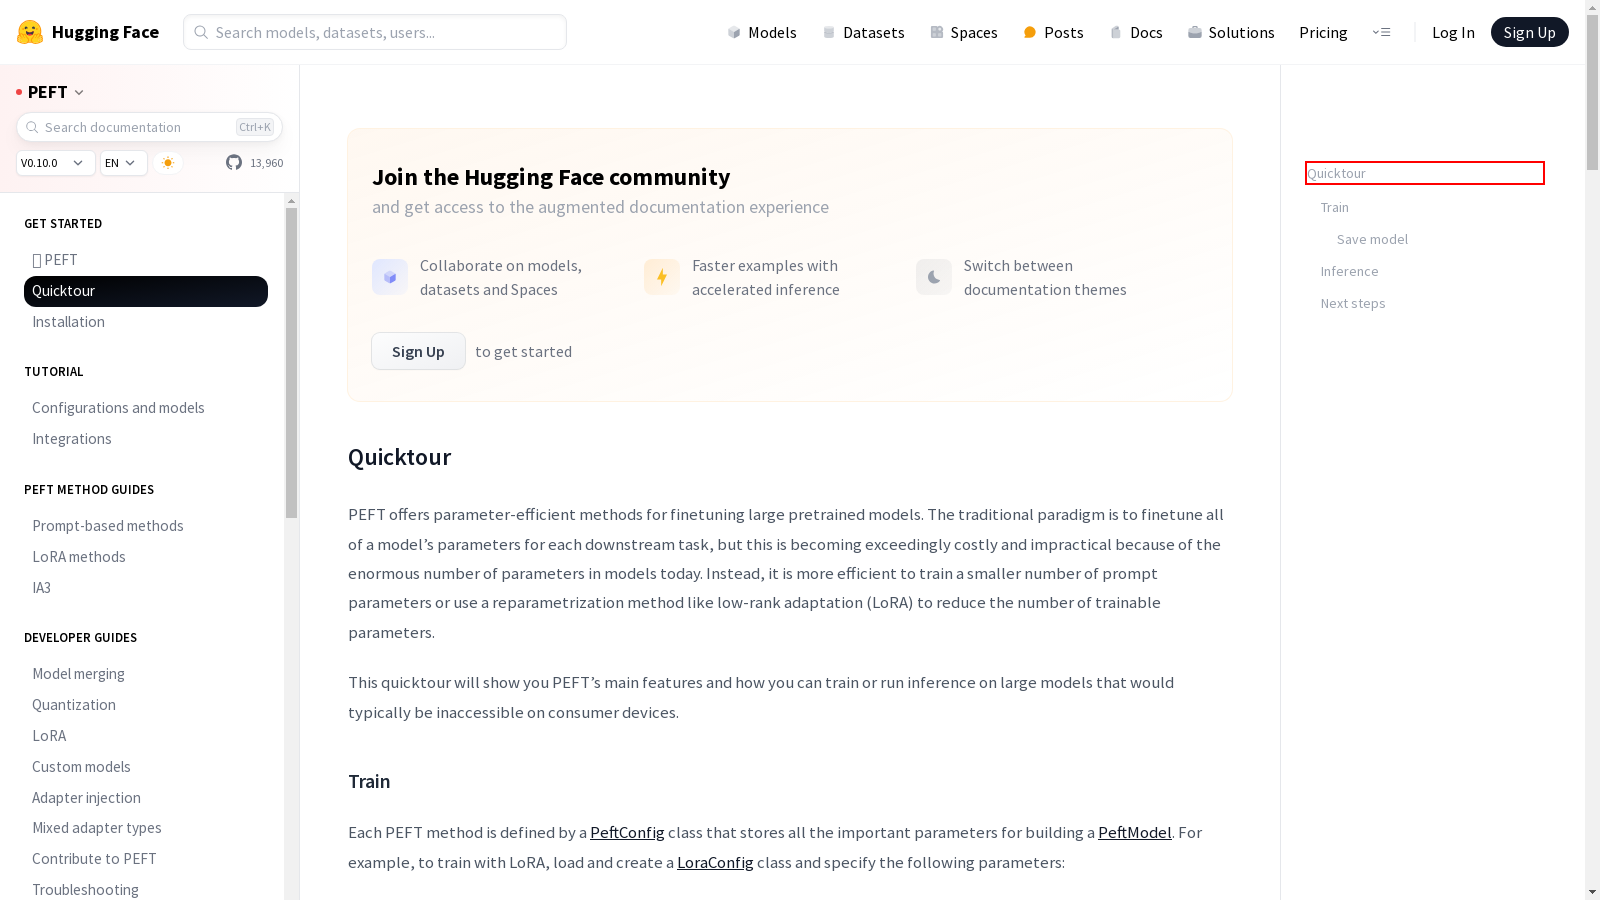

In [27]:
highlight_element(driver, quicktour_link)

In [8]:
def get_bounding_box(element):
    location = element.location
    size = element.size

    # Coordinates
    x_coordinate = location['x']
    y_coordinate = location['y']

    # Size
    width = size['width']
    height = size['height']
    
    box = {
        "x": x_coordinate,
        "y": y_coordinate,
        "width": width,
        "height": height
    }

    return box


def display_bounding_box(element, driver):
    box = get_bounding_box(element)
    from PIL import Image, ImageDraw
    driver.execute_script("arguments[0].scrollIntoView(true);", element)

    driver.save_screenshot("page_screenshot.png")

    image = Image.open("page_screenshot.png")
    draw = ImageDraw.Draw(image)

# Calculate rectangle coordinates
    left = box['x']
    top = box['y']
    right = left + box['width']
    bottom = top + box['height']

    # Draw a rectangle around the element
    draw.rectangle([left, top, right, bottom], outline="red", width=2)

    # Save the modified image
    image.save("highlighted_element.png")

    from IPython.display import Image, display
    display(Image(filename="highlighted_element.png"))

In [10]:
from selenium.webdriver.common.by import By

def get_full_xpath(driver, element):
    parts = []
    while element.tag_name != 'html':
        parent = driver.execute_script('return arguments[0].parentNode;', element)
        siblings = parent.find_elements(By.XPATH, f"./*[name()='{element.tag_name}']")
        count = 0
        index = 1
        for sibling in siblings:
            count += 1
            if sibling == element:
                index = count
        parts.insert(0, f"{element.tag_name}[{index}]")
        element = parent
    parts.insert(0, 'html')  # assuming the root element is always <html>
    full_xpath = '/' + '/'.join(parts)
    return full_xpath

In [19]:
openelm_section.text

''

In [17]:
print(ground_truth_element.text)

OpenELM: An Efficient Language Model Family with Open Training and Inference Framework
Sachin Mehta, Mohammad Hossein Sekhavat, Qingqing Cao, Maxwell Horton, Yanzi Jin, Chenfan Sun, Iman Mirzadeh, Mahyar Najibi, Dmitry Belenko, Peter Zatloukal, Mohammad Rastegari
We introduce OpenELM, a family of Open Efficient Language Models. OpenELM uses a layer-wise scaling strategy to efficiently allocate parameters within each layer of the transformer model, leading to enhanced accuracy. We pretrained OpenELM models using the CoreNet library. We release both pretrained and instruction tuned models with 270M, 450M, 1.1B and 3B parameters.
Our pre-training dataset contains RefinedWeb, deduplicated PILE, a subset of RedPajama, and a subset of Dolma v1.6, totaling approximately 1.8 trillion tokens. Please check license agreements and terms of these datasets before using them.
See the list below for the details of each model:
OpenELM-270M
OpenELM-450M
OpenELM-1_1B
OpenELM-3B
OpenELM-270M-Instruct
Open

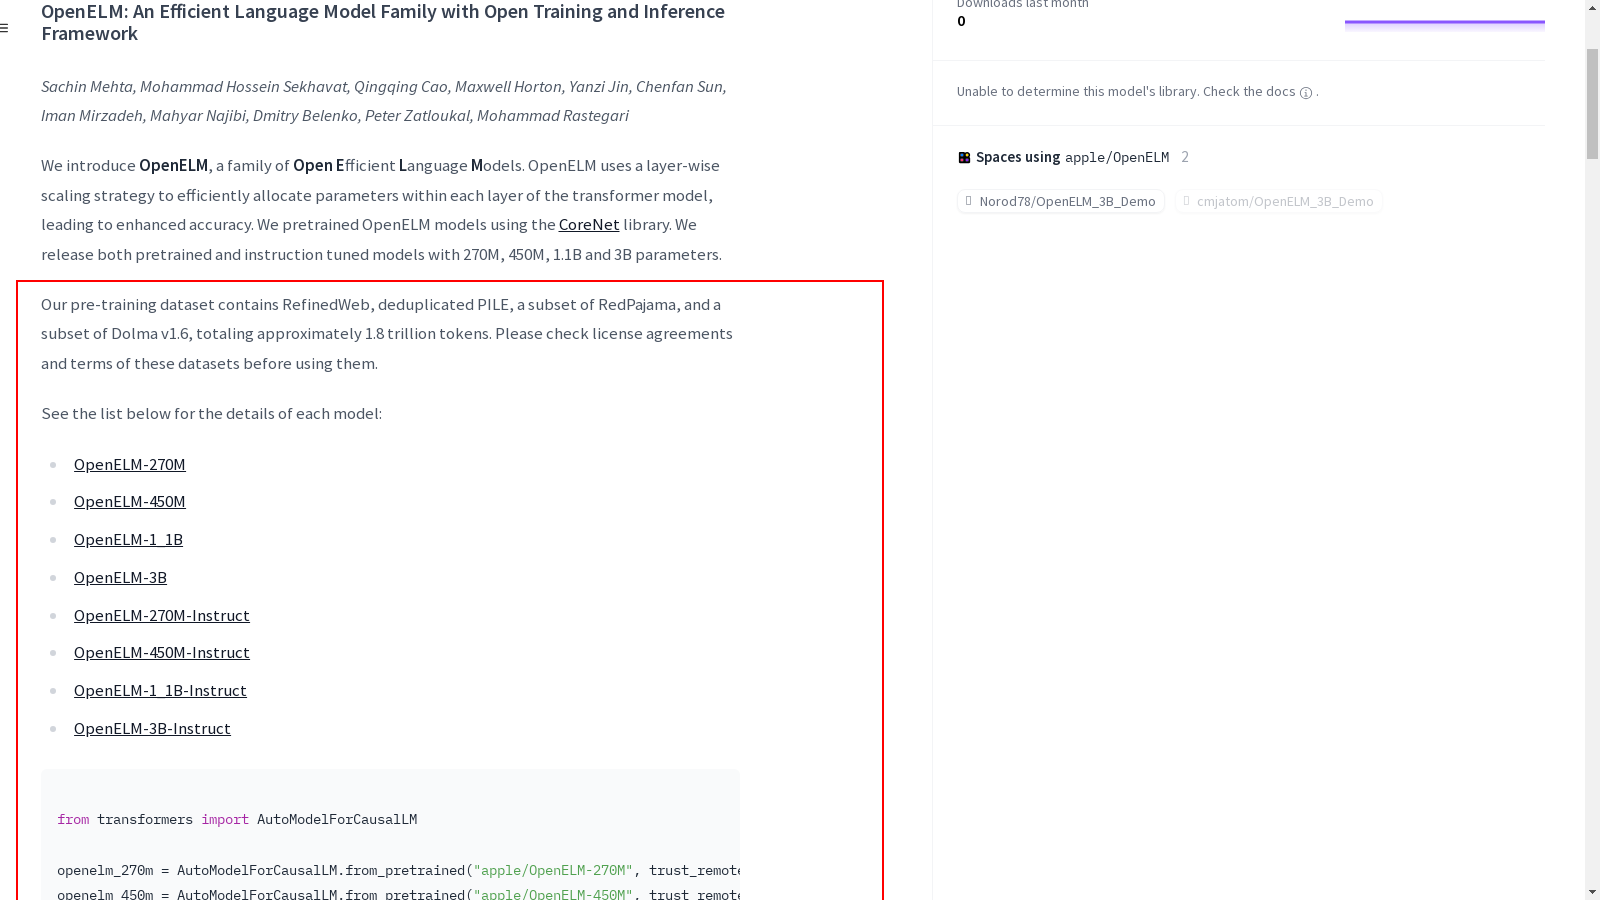

In [15]:
ground_truth_xpath = "/html/body/div[1]/main/div[2]/section[1]/div[3]/div[3]"
ground_truth_element = driver.find_element(By.XPATH, ground_truth_xpath)
display_bounding_box(ground_truth_element, driver)

In [11]:
get_full_xpath(driver, openelm_section)

'/html/body[1]/div[1]/main[1]/div[2]/section[1]/div[3]/div[1]/div[1]/div[1]/div[1]/div[1]/nav[1]/ul[1]/li[1]/a[1]'

In [24]:
driver.get("https://huggingface.co/CohereForAI/c4ai-command-r-plus")

In [27]:
objective = "Type 'What is love?' in the chat box"
expanded_instructions = get_instructions(driver, objective)[0]

In [33]:
expanded_instructions

"Select the input element with placeholder 'Your sentence here...' under the 'Inference API' section, then type 'What is love?'."

In [ ]:
expanded_instructions = "Select the input element with placeholder 'Your sentence here...' under the 'Inference API' section, then type 'What is love?' and press 'Enter'"

In [34]:
html = driver.page_source
expanded_instructions = "Select the input element with placeholder 'Your sentence here...' under the 'Inference API' section, then type 'What is love?' and press 'Enter'"

action = action_engine.get_action(expanded_instructions, html)

/home/daniel/miniconda3/envs/lavague/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


In [35]:
from selenium.webdriver.common.keys import Keys


In [38]:
# Let's proceed step by step.
# First we need to identify the input element with the placeholder 'Your sentence here...' under the 'Inference API' section.

# Based on the HTML snippet provided, we can identify the input element by its placeholder attribute.
# We will use the XPATH to locate the element precisely.
input_element = driver.find_element(By.XPATH, """//*[contains(@placeholder,"Your sentence here...")]""")

# Now that we have identified the input element, we can type the text 'What is love?' into it.
input_element.send_keys("What is love?")

input_element.send_keys(Keys.ENTER)

In [ ]:
input_element.send_keys(Keys.RETURN)

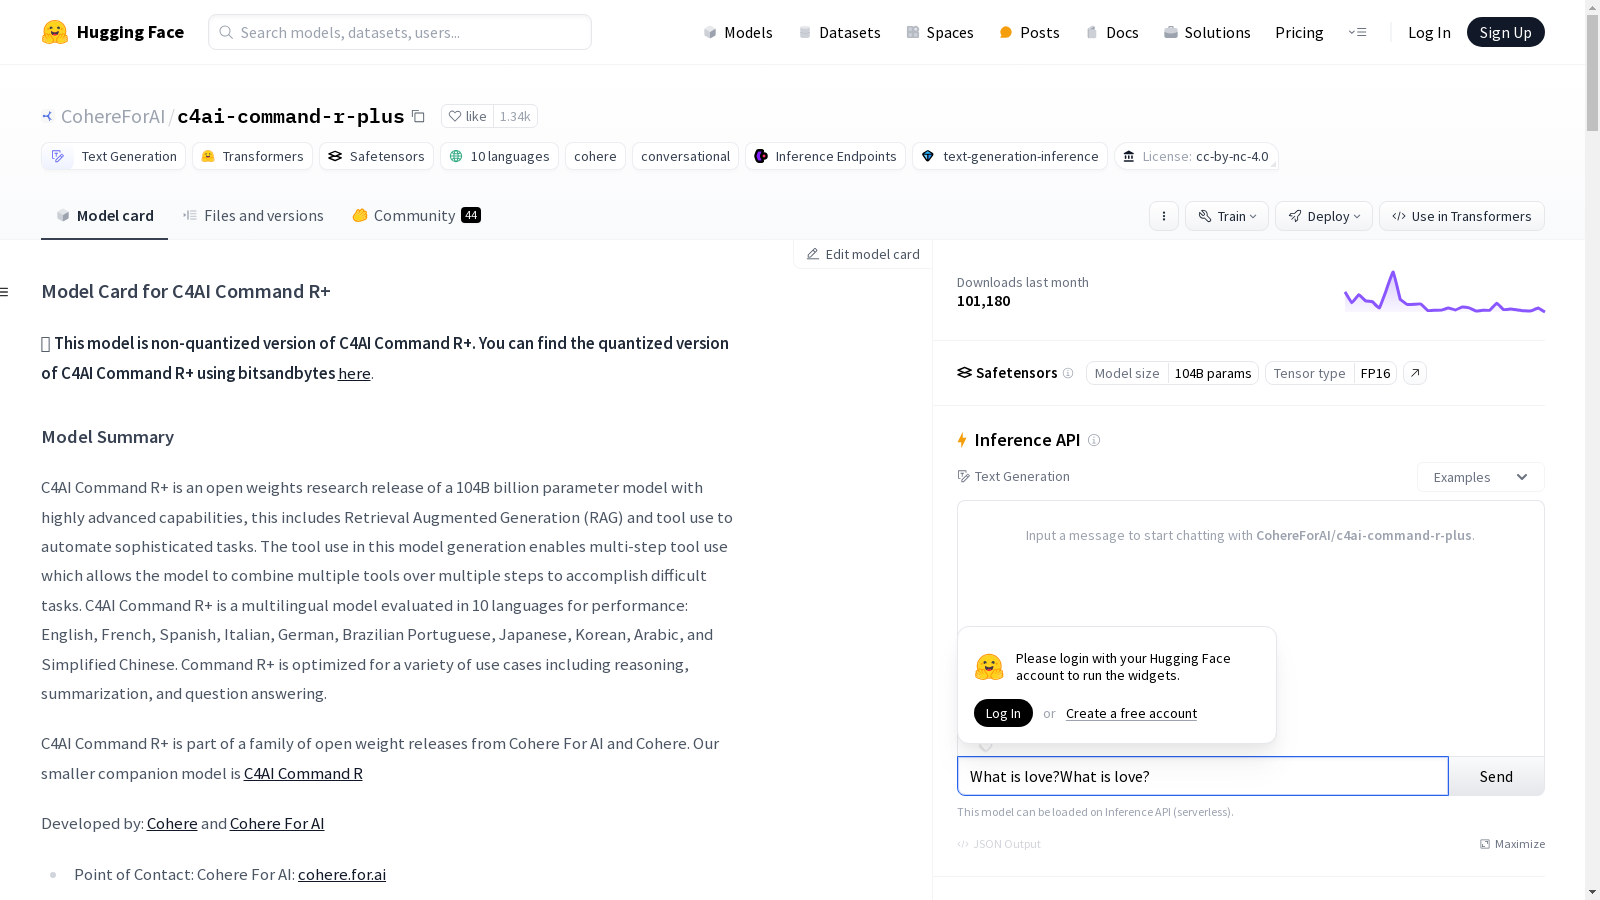

In [39]:
driver.save_screenshot("screenshot.png")
display(Image("screenshot.png"))

/home/daniel/miniconda3/envs/lavague/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


# Let's proceed step by step.
# First we need to identify the section with the text 'OpenELM: An efficient language model family', then we can extract the text.

# Based on the HTML provided, we need to find the element that contains the text.
# We can use the title attribute to precisely target the element.
openelm_section = driver.find_element(By.XPATH, """//*[contains(@title,"OpenELM: An Efficient Language Model Family with Open Training and Inference Framework")]""")

# Now we can print the text of the element found.
print(openelm_section.text)



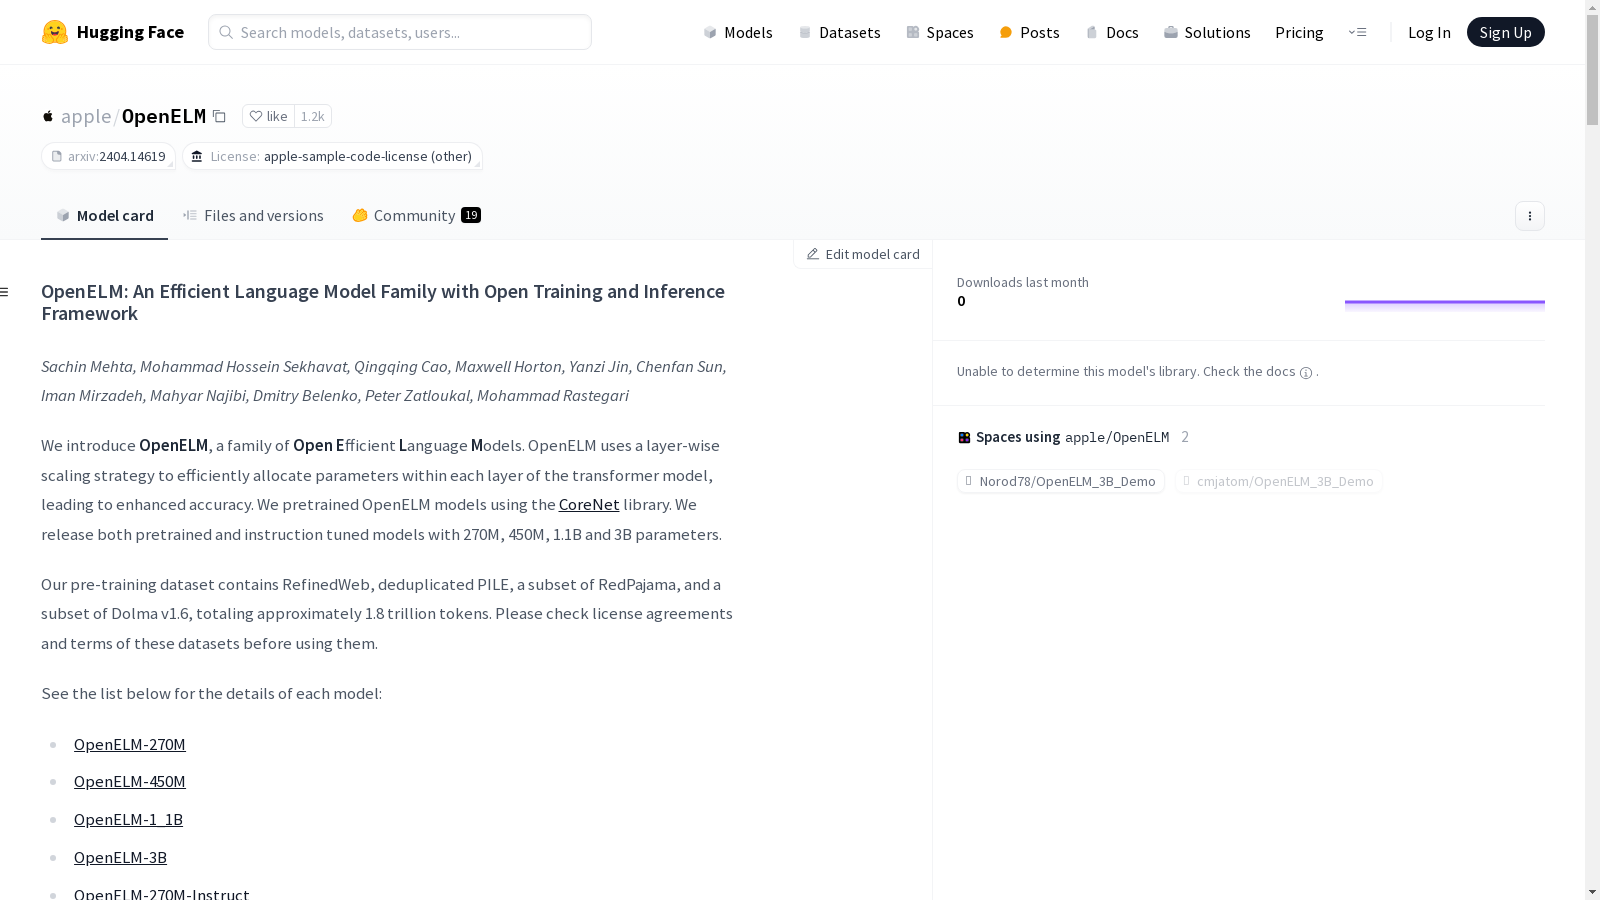

In [ ]:
query = "Print all the text under the section 'OpenELM: An efficient language model family'"
html = driver.page_source

action = action_engine.get_action(query, html)
print(action)
exec(action)

driver.save_screenshot("screenshot.png")

from IPython.display import Image, display
display(Image("screenshot.png"))

In [ ]:

objective = "Click on Submit"
expanded_instructions = get_instructions(driver, objective)[0]
execute_instructions(driver, action_engine, expanded_instructions)
objective = "Click on Datasets"

expanded_instructions = get_instructions(driver, objective)[0]

try: 
    execute_instructions(driver, action_engine, objective)
except Exception as e:
    print("Failed to execute instructions with raw instruction")
    print(e)

try:
    execute_instructions(driver, action_engine, expanded_instructions)
except:
    print("Failed to execute instructions with expanded instruction")
    print(e)
driver.get("https://huggingface.co/")

query = instruction[0]
html = driver.page_source

action = action_engine.get_action(query, html)
exec(action)

driver.save_screenshot("screenshot.png")

from IPython.display import Image, display
display(Image("screenshot.png"))
driver.get("https://huggingface.co/")

query = objective
html = driver.page_source

action = action_engine.get_action(query, html)
exec(action)

driver.save_screenshot("screenshot.png")

from IPython.display import Image, display
display(Image("screenshot.png"))
# Let's proceed step by step.
# First we need to identify the input element, then we can click on it and type the required text.

# Based on the HTML provided, we can identify the input element by its placeholder attribute.
search_input = driver.find_element(By.XPATH, """//*[contains(@placeholder,"Search models, datasets, users...")]""")

# Click on the input element to focus on it
search_input.click()

# Now we can type 'Llama3' into the input element
search_input.send_keys("Llama3")


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import os.path

chrome_options = Options()
chrome_options.add_argument("--headless")  # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--window-size=1600,900")

homedir = os.path.expanduser("~")

# Paths to the chromedriver files
path_linux = f"{homedir}/chromedriver-linux64/chromedriver"
path_testing = f"{homedir}/chromedriver-testing/chromedriver"
path_mac = (
    "Google Chrome for Testing.app/Contents/MacOS/Google Chrome for Testing"
)

# To avoid breaking change kept legacy linux64 path
if os.path.exists(path_linux):
    chrome_options.binary_location = f"{homedir}/chrome-linux64/chrome"
    webdriver_service = Service(f"{homedir}/chromedriver-linux64/chromedriver")
elif os.path.exists(path_testing):
    if os.path.exists(f"{homedir}/chrome-testing/{path_mac}"):
        chrome_options.binary_location = f"{homedir}/chrome-testing/{path_mac}"
    # Can add support here for other chrome binaries with else if statements
    webdriver_service = Service(f"{homedir}/chromedriver-testing/chromedriver")
else:
    raise FileNotFoundError("Neither chromedriver file exists.")

driver = webdriver.Chrome(service=webdriver_service, options=chrome_options)